In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import hvplot.pandas
import locale
locale.setlocale( locale.LC_ALL, 'en_CA.UTF-8' )
%matplotlib inline
import yfinance as yf

In [ ]:
#Define Global Variables
# Number of simulations
# Benchmark

In [3]:
user_portfolio_name = ["MSFT", "AAPL", "AMZN","GOOGL","FB", "V", "JPM"]
# user_portfolio_name = ["MSFT"]
#Display Benchmark info
benchmark=["SPY"]

list_of_tickers=benchmark+user_portfolio_name

data = yf.download(
        tickers = list_of_tickers,
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        period = "30y",
        interval = "1d",
        group_by = 'ticker',

        # adjust all OHLC automatically, adjusted for stock splits
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
data.head()

[*********************100%***********************]  8 of 8 completed


FB                       GOOGL                        ... AMZN  \
           Open High Low Close Volume  Open High Low Close Volume  ... Open   
Date                                                               ...        
1990-05-15  NaN  NaN NaN   NaN    NaN   NaN  NaN NaN   NaN    NaN  ...  NaN   
1990-05-16  NaN  NaN NaN   NaN    NaN   NaN  NaN NaN   NaN    NaN  ...  NaN   
1990-05-17  NaN  NaN NaN   NaN    NaN   NaN  NaN NaN   NaN    NaN  ...  NaN   
1990-05-18  NaN  NaN NaN   NaN    NaN   NaN  NaN NaN   NaN    NaN  ...  NaN   
1990-05-21  NaN  NaN NaN   NaN    NaN   NaN  NaN NaN   NaN    NaN  ...  NaN   

                                  SPY                        
           High Low Close Volume Open High Low Close Volume  
Date                                                         
1990-05-15  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  
1990-05-16  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  
1990-05-17  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  
1990-05-18  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  
1990-05-21  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  

[5 rows x 40 columns]

In [4]:
df_yf = data.sort_index()
df_yf.drop(columns=['Open', 'High', 'Low', 'Volume'], level=1, inplace=True)
df_yf = df_yf.droplevel(axis=1, level=1)
df_yf.index = df_yf.index.date
df_yf.dropna(inplace=True)
df_yf.head()

FB       GOOGL          V       MSFT       AAPL        JPM  \
2012-05-18  38.230000  300.500488  24.904375  24.394806  65.592659  26.767208   
2012-05-21  34.029999  307.362366  25.695906  24.794863  69.414101  25.983931   
2012-05-22  31.000000  300.700714  26.175695  24.803186  68.881065  27.182817   
2012-05-23  32.000000  305.035034  26.348145  24.261457  70.561768  27.382633   
2012-05-24  33.029999  302.132141  26.480799  24.228115  69.913734  27.150858   

                  AMZN         SPY  
2012-05-18  213.850006  110.416977  
2012-05-21  218.110001  112.314842  
2012-05-22  215.330002  112.510582  
2012-05-23  217.279999  112.570198  
2012-05-24  215.240005  112.791443

In [5]:
user_portfolio_df=df_yf.drop([benchmark[0]], axis =1)
user_portfolio_df.tail()
bm_portfolio_df=df_yf[benchmark[0]]
bm_portfolio_df.head()

2012-05-18    110.416977
2012-05-21    112.314842
2012-05-22    112.510582
2012-05-23    112.570198
2012-05-24    112.791443
Name: SPY, dtype: float64

In [178]:
user_portfolio_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [6]:
#portfolio historic returs
user_portfolio_returns = user_portfolio_df.pct_change().dropna()
user_portfolio_returns#.hvplot()

FB     GOOGL         V      MSFT      AAPL       JPM  \
2012-05-21 -0.109861  0.022835  0.031783  0.016399  0.058260 -0.029263   
2012-05-22 -0.089039 -0.021674  0.018672  0.000336 -0.007679  0.046140   
2012-05-23  0.032258  0.014414  0.006588 -0.021841  0.024400  0.007351   
2012-05-24  0.032187 -0.009517  0.005035 -0.001374 -0.009184 -0.008464   
2012-05-25 -0.033909 -0.020094 -0.003340 -0.000344 -0.005360 -0.013836   
...              ...       ...       ...       ...       ...       ...   
2020-05-08  0.005160  0.010998  0.012971  0.005882  0.023802  0.016336   
2020-05-11  0.003909  0.013906 -0.008266  0.011154  0.015735 -0.029450   
2020-05-12 -0.014448 -0.020241 -0.022282 -0.022652 -0.011428 -0.032678   
2020-05-13 -0.023798 -0.019525 -0.011609 -0.015122 -0.012074 -0.034471   
2020-05-14  0.008337  0.006326  0.021514  0.004339  0.006143  0.041533   

                AMZN  
2012-05-21  0.019920  
2012-05-22 -0.012746  
2012-05-23  0.009056  
2012-05-24 -0.009389  
2012-05-25 -0.010918  
...              ...  
2020-05-08  0.005068  
2020-05-11  0.012351  
2020-05-12 -0.021606  
2020-05-13  0.004654  
2020-05-14  0.008839  

[2009 rows x 7 columns]

In [7]:
#benchmark historic returns
bm_portfolio_returns = bm_portfolio_df.pct_change().dropna()
bm_portfolio_returns.head() #.hvplot()

2012-05-21    0.017188
2012-05-22    0.001743
2012-05-23    0.000530
2012-05-24    0.001965
2012-05-25   -0.003244
Name: SPY, dtype: float64

## Define variables for Benchmark simulation

In [8]:
bm_portfolio_ret_mean = bm_portfolio_returns.mean()
bm_portfolio_ret_std = bm_portfolio_returns.std()
bm_portfolio_last_p = bm_portfolio_df[-1]

#TODO provide clear message to user, round to two decimal points
#we might want to illustrate what standard deviation means
print(f'Your portfolio average return from SD to ED is:{bm_portfolio_ret_mean}')
print(f'Your portfolio standard deviation from SD to ED is:{bm_portfolio_ret_std}')
print(f'The present value of your benchmark is from SD to ED is:{bm_portfolio_last_p}')

Your portfolio average return from SD to ED is:0.0005258998227939382
Your portfolio standard deviation from SD to ED is:0.010353431700237687
The present value of your benchmark is from SD to ED is:284.9700012207031


## Run simulation for BM

## Define variables for User Profile

In [9]:
bm_means = {}
bm_std = {}
bm_last_day = {}

for stock in user_portfolio_name:
    bm_means[stock] = user_portfolio_df.mean()[stock]
    bm_std[stock] = user_portfolio_df.std()[stock]
    bm_last_day[stock] = user_portfolio_df[stock][-1]

bm_last_day

{'MSFT': 180.52999877929688,
 'AAPL': 309.5400085449219,
 'AMZN': 2388.85009765625,
 'GOOGL': 1356.8599853515625,
 'FB': 206.80999755859375,
 'V': 180.89999389648438,
 'JPM': 87.5199966430664}

## Run Monte Carlo Simulation for Benchmark

In [69]:
yf_daily_returns.loc[:,benchmark]

SPY
2012-05-21  0.017188
2012-05-22  0.001743
2012-05-23  0.000530
2012-05-24  0.001965
2012-05-25 -0.003244
...              ...
2020-05-04  0.002758
2020-05-05  0.009239
2020-05-06 -0.006779
2020-05-07  0.012067
2020-05-08  0.016546

[2005 rows x 1 columns]

In [101]:
# Run the Monte Carlo Simulation
number_simulations = 500 # columns
number_records = 252 * 30 # rows
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()
benchmark_last_price = df_yf.loc[:,benchmark].iloc[-1,0]
print(benchmark_last_price)
avg_daily_return_benchmark = yf_daily_returns.mean()['SPY']
std_dev_daily_return_benchmark = yf_daily_returns.std()['SPY']
print(avg_daily_return_benchmark)
print(std_dev_daily_return_benchmark)

292.44000244140625
0.0005396397574629934
0.010342514438189745


In [236]:
number_simulations = 1000 # columns
number_records = 30*252# rows

# Set last closing prices of `JNJ` and `MU`
bm_last_price = df_yf.loc[:,benchmark].iloc[-1,0]
# mu_last_price = df['MU']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(number_records):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_benchmark_prices = [bm_last_price]
#     simulated_mu_prices = [mu_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_benchmark_price = simulated_benchmark_prices[-1] * (1 + np.random.normal(avg_daily_return_benchmark, std_dev_daily_return_benchmark))
#         simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))
        
        # Append the simulated price to the list
        simulated_benchmark_prices.append(simulated_benchmark_price)
#         simulated_mu_prices.append(simulated_mu_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_benchmark_prices)
#     simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    b_weights = [1.00]
#     p_weights = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[f'T{n}'] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

T0        T1        T2        T3        T4        T5        T6  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.997552  1.004054  0.984829  0.990317  1.006599  0.998643  1.016461   
2  1.002329  1.013245  0.977844  0.972859  1.002464  0.994575  1.018980   
3  1.028797  1.012446  0.976297  0.974967  1.023629  1.002066  1.026308   
4  1.016972  1.027060  0.953341  0.979341  1.034090  0.985526  1.012901   

         T7        T8        T9  ...     T7550     T7551     T7552     T7553  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.002993  0.987568  1.001788  ...  0.999236  1.012345  1.016166  1.005972   
2  0.986376  0.996424  1.013621  ...  0.995071  1.011097  1.013693  1.002749   
3  0.991482  1.001170  1.015052  ...  0.998245  1.002738  0.999531  0.993324   
4  0.998717  1.006286  1.017766  ...  0.987513  1.016818  0.997842  1.007691   

      T7554     T7555     T7556     T7557     T7558     T7559  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.996876  0.993004  1.003932  0.989073  1.008716  0.998702  
2  0.992642  0.986783  1.014137  0.996936  1.004873  0.991059  
3  0.988050  0.974276  1.035936  0.996608  1.006041  0.997290  
4  0.989103  0.984160  1.027423  0.977318  1.011999  0.998441  

[5 rows x 7560 columns]

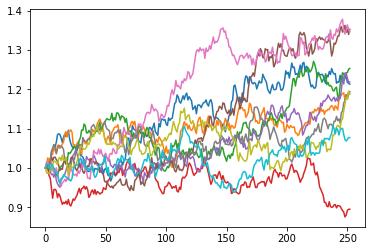

In [151]:
portfolio_cumulative_returns.plot(legend=None,);

## Run portfolio Monte Carlo Simulation

In [60]:
#TODO Enter users weghts variable
weights = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]
portfolio_returns = yf_daily_returns.drop(benchmark,axis=1)
weighted_portfolio_returns=portfolio_returns.dot(weights)
# yf_daily_returns_df2=yf_daily_returns.dot(weights)
# yf_daily_returns_df2.head()
weighted_portfolio_returns#.tail()

2012-05-21    0.001439
2012-05-22   -0.009427
2012-05-23    0.010318
2012-05-24   -0.000101
2012-05-25   -0.012543
                ...   
2020-05-04    0.008875
2020-05-05    0.009510
2020-05-06    0.003114
2020-05-07    0.012381
2020-05-08    0.011460
Length: 2005, dtype: float64

In [ ]:
number_simulations = 500 # columns
number_records = 252 * 30 # rows

# Set last closing prices of `JNJ` and `MU`
benchmark_last_price = df_yf.loc[:,benchmark].iloc[-1,0]
# mu_last_price = df['MU']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_benchmark_prices = [benchmark_last_price]
#     simulated_mu_prices = [mu_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_benchmark_price = simulated_benchmark_prices[-1] * (1 + np.random.normal(avg_daily_return_benchmark, std_dev_daily_return_benchmark))
#         simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))
        
        # Append the simulated price to the list
        simulated_benchmark_prices.append(simulated_benchmark_price)
#         simulated_mu_prices.append(simulated_mu_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_benchmark_prices)
#     simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    b_weights = [1.00]
#     p_weights = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[f'T{n}'] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

# Enter desired parameters

Enter ticker symbols, weights

In [6]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [148]:
# stock1= input("stock:")
# print(stock1)

datetime.now()

datetime.datetime(2020, 5, 9, 1, 23, 43, 287661)

In [243]:
#using adjusted close might be better
aapl = api.alpha_vantage.historic_quotes(['spy'], adjusted=True, output_format='pandas')
aapl.tail()

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                    
2000-05-12  141.8125  143.4687  141.6250  142.8125            97.8034   
2000-05-11  140.1250  141.5000  139.1250  141.2812            96.7547   
2000-05-10  140.5000  140.9687  137.7500  138.1250            94.5932   
2000-05-09  143.0625  143.4062  140.2656  141.3125            96.7761   
2000-05-08  142.7500  143.3750  141.8437  142.4531            97.5572   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2000-05-12   5960800.0                 0.0                   1.0  
2000-05-11   7091100.0                 0.0                   1.0  
2000-05-10  10293900.0                 0.0                   1.0  
2000-05-09   5620300.0                 0.0                   1.0  
2000-05-08   5064100.0                 0.0                   1.0

In [7]:
# list_of_tickers = [stock1]
list_of_tickers = ["ADM", "AGG"]
# TODO test with other variables: '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('1990-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data using alpaca api
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
df.tail()
# df.columns


ADM                                   AGG  \
                            open   high    low  close   volume    open   
2020-04-27 00:00:00-04:00  35.87  36.71  35.81  36.55  1610349  117.21   
2020-04-28 00:00:00-04:00  37.17  37.31  36.31  37.18  2298554  117.27   
2020-04-29 00:00:00-04:00  37.90  38.60  37.64  38.43  2974932  117.29   
2020-04-30 00:00:00-04:00  38.40  38.71  37.05  37.12  3244053  117.38   
2020-05-01 00:00:00-04:00  36.66  36.93  34.94  35.12  2351702  116.97   

                                                                 
                               high       low   close    volume  
2020-04-27 00:00:00-04:00  117.3600  116.8200  116.84   6707494  
2020-04-28 00:00:00-04:00  117.4500  117.1200  117.25  10729690  
2020-04-29 00:00:00-04:00  117.4800  117.2000  117.43   9036494  
2020-04-30 00:00:00-04:00  117.4900  117.0650  117.15  13756340  
2020-05-01 00:00:00-04:00  117.0998  116.6775  116.90  11778582

In [9]:
df = df.sort_index()
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df = df.droplevel(axis=1, level=1)
df.index = df.index.date
df.dropna(inplace=True)
df.tail()

ADM     AGG
2020-04-27  36.55  116.84
2020-04-28  37.18  117.25
2020-04-29  38.43  117.43
2020-04-30  37.12  117.15
2020-05-01  35.12  116.90

In [151]:
# df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [71]:
user_portfolio_name = ["MSFT", "AAPL", "AMZN","GOOGL","FB", "V", "JPM"]
# user_portfolio_name = ["MSFT"]
#Display Benchmark info
benchmark=["SPY"]

list_of_tickers=benchmark+user_portfolio_name

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
#TODO Introduce today variable & 30 yrs
start_date = pd.Timestamp('1990-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Get 1 year's worth of historical data using alpaca api
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
df.head()
# df.head()
# df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)

NameError: name 'api' is not defined

In [77]:
df = df.sort_index()
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df = df.droplevel(axis=1, level=1)
df.index = df.index.date
df.dropna(inplace=True)
df.head()

ADM    AMZN       FB    GOOGL      JPM   MSFT     SPY       V
2012-05-18  27.18  213.78  38.1820  300.495  33.4900  29.27  129.82  28.160
2012-05-21  32.19  218.26  34.0255  307.237  32.5250  29.75  131.95  29.043
2012-05-22  32.17  215.61  31.1100  300.700  34.0100  29.77  132.07  29.600
2012-05-23  31.93  217.28  32.0000  305.025  34.2724  29.10  132.26  29.803
2012-05-24  27.42  215.24  33.0200  302.207  33.9800  29.08  132.50  29.943

In [78]:
##TODO drop level is not working, need to sink header from list of tickers compared to the order of socks received. headers incorrect name

# df = df.droplevel(axis=1, level=0)

# # Use the drop function to drop extra columns
# df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)

# # Since this is daily data, we can keep only the date (remove the time) component of the data
# df.index = df.index.date

# columns= list_of_tickers
# df.columns=columns
cleaned_df=df
cleaned_df
# historic_close=df
# historic_close.head()

ADM     AMZN        FB     GOOGL      JPM    MSFT     SPY  \
2012-05-18  27.18   213.78   38.1820   300.495  33.4900   29.27  129.82   
2012-05-21  32.19   218.26   34.0255   307.237  32.5250   29.75  131.95   
2012-05-22  32.17   215.61   31.1100   300.700  34.0100   29.77  132.07   
2012-05-23  31.93   217.28   32.0000   305.025  34.2724   29.10  132.26   
2012-05-24  27.42   215.24   33.0200   302.207  33.9800   29.08  132.50   
...           ...      ...       ...       ...      ...     ...     ...   
2020-04-27  36.55  2376.82  187.5400  1270.860  94.3700  174.03  287.11   
2020-04-28  37.18  2314.08  182.8600  1232.310  95.2801  169.79  285.77   
2020-04-29  38.43  2371.88  193.9900  1341.221  97.7900  177.30  293.19   
2020-04-30  37.12  2471.50  204.7100  1346.860  95.7600  179.22  290.39   
2020-05-01  35.12  2285.94  202.2800  1317.300  93.2500  174.50  282.73   

                  V  
2012-05-18   28.160  
2012-05-21   29.043  
2012-05-22   29.600  
2012-05-23   29.803  
2012-05-24   29.943  
...             ...  
2020-04-27  171.760  
2020-04-28  171.280  
2020-04-29  181.860  
2020-04-30  178.630  
2020-05-01  175.740  

[2001 rows x 8 columns]

In [79]:
#TODO change to hvplot, Define function to create plot
cleaned_df.hvplot()
# cleaned_df.plot(label="test",kind='line',title='Historic Pricing', figsize=[20,2])
# df3.plot(label="test",kind='line',title='Historic Returns', figsize=[20,2])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

# Select year and month of historical data

In [ ]:
user_sd= 2015
user_ed= 2019

cleaned_df

In [80]:
#TODO Remove NsN
#TODO calculate user's portfolio cumulative return
daily_returns = cleaned_df.pct_change()
daily_returns

ADM      AMZN        FB     GOOGL       JPM      MSFT  \
2012-05-18       NaN       NaN       NaN       NaN       NaN       NaN   
2012-05-21  0.184327  0.020956 -0.108860  0.022436 -0.028815  0.016399   
2012-05-22 -0.000621 -0.012141 -0.085686 -0.021277  0.045657  0.000672   
2012-05-23 -0.007460  0.007745  0.028608  0.014383  0.007715 -0.022506   
2012-05-24 -0.141246 -0.009389  0.031875 -0.009239 -0.008532 -0.000687   
...              ...       ...       ...       ...       ...       ...   
2020-04-27  0.015842 -0.013768 -0.013467 -0.004504  0.040463 -0.002922   
2020-04-28  0.017237 -0.026397 -0.024955 -0.030334  0.009644 -0.024364   
2020-04-29  0.033620  0.024978  0.060866  0.088380  0.026342  0.044231   
2020-04-30 -0.034088  0.042000  0.055261  0.004204 -0.020759  0.010829   
2020-05-01 -0.053879 -0.075080 -0.011870 -0.021947 -0.026211 -0.026336   

                 SPY         V  
2012-05-18       NaN       NaN  
2012-05-21  0.016407  0.031357  
2012-05-22  0.000909  0.019178  
2012-05-23  0.001439  0.006858  
2012-05-24  0.001815  0.004698  
...              ...       ...  
2020-04-27  0.014380  0.026966  
2020-04-28 -0.004667 -0.002795  
2020-04-29  0.025965  0.061770  
2020-04-30 -0.009550 -0.017761  
2020-05-01 -0.026378 -0.016179  

[2001 rows x 8 columns]

In [81]:
daily_returns.dropna()

ADM      AMZN        FB     GOOGL       JPM      MSFT  \
2012-05-21  0.184327  0.020956 -0.108860  0.022436 -0.028815  0.016399   
2012-05-22 -0.000621 -0.012141 -0.085686 -0.021277  0.045657  0.000672   
2012-05-23 -0.007460  0.007745  0.028608  0.014383  0.007715 -0.022506   
2012-05-24 -0.141246 -0.009389  0.031875 -0.009239 -0.008532 -0.000687   
2012-05-25  0.004376 -0.010918 -0.033995 -0.020635 -0.014715 -0.001032   
...              ...       ...       ...       ...       ...       ...   
2020-04-27  0.015842 -0.013768 -0.013467 -0.004504  0.040463 -0.002922   
2020-04-28  0.017237 -0.026397 -0.024955 -0.030334  0.009644 -0.024364   
2020-04-29  0.033620  0.024978  0.060866  0.088380  0.026342  0.044231   
2020-04-30 -0.034088  0.042000  0.055261  0.004204 -0.020759  0.010829   
2020-05-01 -0.053879 -0.075080 -0.011870 -0.021947 -0.026211 -0.026336   

                 SPY         V  
2012-05-21  0.016407  0.031357  
2012-05-22  0.000909  0.019178  
2012-05-23  0.001439  0.006858  
2012-05-24  0.001815  0.004698  
2012-05-25 -0.002717 -0.003440  
...              ...       ...  
2020-04-27  0.014380  0.026966  
2020-04-28 -0.004667 -0.002795  
2020-04-29  0.025965  0.061770  
2020-04-30 -0.009550 -0.017761  
2020-05-01 -0.026378 -0.016179  

[2000 rows x 8 columns]

In [82]:
#TODO figure out what caused "SPY" swing, 
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [232]:
#Why only min only to 2008?
print(df.index.min())
print(df.index.max())

2008-01-02
2020-05-01


In [73]:
#Asign weigh distribution of portfolio with a desired PV.

initial_investment = 20000
#TODO To find weight distribution have to either drop all NANs or calculate proportional weight based on available investment
#proportional weight =sum(row)
# weights = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]
weights = [1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8]
# df4=daily_returns.dot(weights)
daily_returns.isnull().sum()

AAPL     1
AMZN     1
FB       1
GOOGL    1
JPM      1
MSFT     1
SPY      1
V        1
dtype: int64

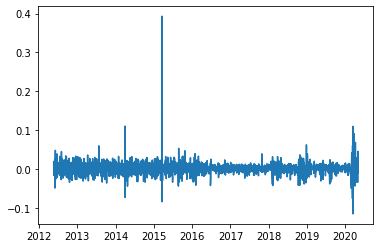

In [83]:
#TODO we might have to clean NANs
df2=daily_returns.dot(weights)
df2.plot()

In [ ]:
df.hvplot.line(x='Year', y='Violent Crime rate')

In [115]:
df.hvplot()

AttributeError: 'DataFrame' object has no attribute 'hvplot'

# Monte Carlo Simulation

In [70]:
# Calculate the daily roi for the stocks
#Data Load
#Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df = df.droplevel(axis=1, level=0)
# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

# columns=["AGG","SPY"]
# df.columns=columns

historic_close=df
# historic_close.head()

df_roi=historic_close.pct_change()
df_roi.head()


NameError: name 'df' is not defined

In [41]:
## Calculate volatility
#Average historic returns
avg_daily_return_AGG = df_roi.mean()['AGG']
avg_daily_return_SPY = df_roi.mean()['SPY']
std_dev_daily_return_AGG = df_roi.std()['AGG']
std_dev_daily_return_SPY = df_roi.std()['SPY']

print(f'The standard deviation for AGG is:{std_dev_daily_return_AGG}')
print(f'The standard deviation for SPY is:{std_dev_daily_return_SPY}')

The standard deviation for AGG is:0.008486380070068245
The standard deviation for SPY is:0.030902726500259218


In [42]:
# Save the last day's closing price
agg_last_price = historic_close['AGG'][-1]
spy_last_price = historic_close['SPY'][-1]
print(f'Last closing price for for AGG is:{locale.currency(agg_last_price)}')
print(f'Last closing price for for SPY is:{locale.currency(spy_last_price)}')

Last closing price for for AGG is:$116.73
Last closing price for for SPY is:$287.70


In [86]:
# Setup the Monte Carlo Parameters
#number of simulations X n # of days
number_simulations = 500 # columns
number_records = 252 * 30 # rows
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [87]:
# Run the Monte Carlo Simulation

# set # of simulations with defined variables
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price as PV.
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * i days variable predefined.
    #Using normal distribution on random
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_AGG, std_dev_daily_return_AGG))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_SPY, std_dev_daily_return_SPY))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]
    
     # Use the `dot` Numpy function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    #columns header WIP
    monte_carlo[f"Simulation{n}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print head of DataFrame
monte_carlo.head()

NameError: name 'agg_last_price' is not defined

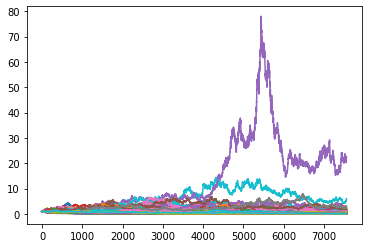

In [45]:
# Visualize the Simulation
monte_carlo.plot(legend=None,);

In [64]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = monte_carlo.iloc[-1, :]
ending_cumulative_returns.head()

0    0.125370
1    0.195310
2    0.232429
3    0.706620
4    0.122965
Name: 7560, dtype: float64

In [65]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
#20 yrs hardcoded for now
ending_cumulative_returns = monte_carlo.iloc[-2520, :]
ending_cumulative_returns.head()

0    0.624795
1    0.074677
2    0.561163
3    0.261969
4    0.677228
Name: 5041, dtype: float64

In [66]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.027793
0.95    1.784260
Name: 5041, dtype: float64

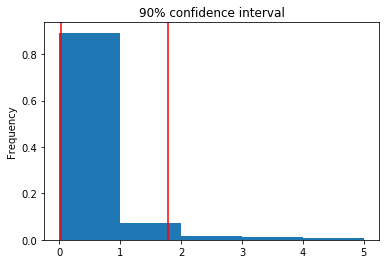

In [67]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=[0,1,2,3,4,5],title="90% confidence interval")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [68]:
# confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
print(f'Expected cumulative return at yr 30 for 10th percentile is: {confidence_interval.iloc[0]}')
print(f'Expected cumulative return at yr 30 for 10th percentile is: {ending_cumulative_returns.median()}')
print(f'Expected cumulative return at yr 30 for 90th percentile is: {confidence_interval.iloc[1]}')


Expected cumulative return at yr 30 for 10th percentile is: 0.02779335190234906
Expected cumulative return at yr 30 for 10th percentile is: 0.21580133055241146
Expected cumulative return at yr 30 for 90th percentile is: 1.784259655077452


In [96]:
confidence_interval.iloc[1]

1.784259655077452

In [ ]:
ending_cumulative_returns.median()

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [110]:
initial_investment = 20000

# Calculate cumulative profit/loss of lower and upper bound
#weights are hardcoaded for now
cumulative_pnl_lower_bound = initial_investment *     ((confidence_interval.iloc[0] - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))
cumulative_pnl_mid_bound = initial_investment *     (((confidence_interval.iloc[1] -confidence_interval.iloc[0]) - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))
cumulative_pnl_upper_bound = initial_investment *     ((confidence_interval.iloc[1] - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_mid_bound = initial_investment + cumulative_pnl_mid_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound
print(locale.currency(ending_investment_lower_bound,grouping=True))
print(locale.currency(ending_investment_mid_bound,grouping=True))
print(locale.currency(ending_investment_upper_bound,grouping=True))
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in this portfolio"
      f" over the next 30 trading years will end within in the range of"
      f" {locale.currency(ending_investment_lower_bound,grouping=True)} for the 10th percentile, {locale.currency(ending_investment_mid_bound,grouping=True)} for the 50th percentile, and {locale.currency(ending_investment_upper_bound,grouping=True)} for the 90th percentile")

$555.87
$35,129.33
$35,685.19
There is a 90% chance that an initial investment of $20,000 in this portfolio over the next 30 trading years will end within in the range of $555.87 for the 10th percentile, $35,129.33 for the 50th percentile, and $35,685.19 for the 90th percentile


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [103]:
#projected annual income before taxes =$7,389?
.04 * (initial_investment * ending_cumulative_returns.quantile(.1))


35.49989544522024

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE